Importe

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import modules

import more_itertools

Fragestellung: In welchen Berufen arbeiten die Visa Bewerber? Top 30 anzeigen lassen, sonst zu viele Werte

In [56]:
col_list= ["job_info_job_title", "pw_job_title_9089", "pw_job_title_908"]
visas_df = pd.read_csv("us_perm_visas.csv", usecols=col_list)
visas_df.head ()


modules.print_full(visas_df['job_info_job_title'].value_counts()[:1000])

C:\Users\lassu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (71,94,95) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Software Engineer                                                                 14827
Computer Systems Analyst - V                                                       4755
Senior Software Engineer                                                           3925
Computer Systems Analyst - II                                                      3434
Software Developer                                                                 3013
Assistant Professor                                                                2674
Programmer Analyst                                                                 2640
Computer Systems Analyst - IV                                                      2501
Systems Analyst                                                                    2093
Poultry Processing Worker                                                          1987
Software Development Engineer II                                                   1656
Poultry Processor               

Scheinbar enthält die Liste der Job Titel mehrere gleiche Werte, Datensatz bereinigen

In [43]:
visas_df['job_info_job_title'] = visas_df['job_info_job_title'].str.lower()

#Splitting job titles by '-'
visas_df['job_info_job_title'] = visas_df['job_info_job_title'].astype(str).str.split('-').str[0]
#Splitting job titles by 'ii'
visas_df['job_info_job_title'] = visas_df['job_info_job_title'].astype(str).str.split('ii').str[0]
#Splitting job titles by '/'
visas_df['job_info_job_title'] = visas_df['job_info_job_title'].astype(str).str.split('/').str[0]
#Removing leading and ending spaces
visas_df['job_info_job_title'] = visas_df['job_info_job_title'].astype(str).str.strip()
#Replacing "sr." values with "senior"
visas_df['job_info_job_title'] = visas_df['job_info_job_title'].str.replace('sr.', 'senior')
#Replacing "NaN", "NaT" and "nan" values with np.nan
visas_df['job_info_job_title'].replace(["NaN", 'NaT','nan'], np.nan, inplace = True)


visas_df['job_info_job_title'].value_counts(dropna=True)[:20]

software engineer                19211
computer systems analyst         12138
senior software engineer          5978
software developer                4721
programmer analyst                3918
assistant professor               2952
software development engineer     2814
systems analyst                   2670
poultry processing worker         1989
senior programmer analyst         1930
senior software developer         1671
business analyst                  1593
poultry processor                 1295
component design engineer         1129
project manager                   1098
accountant                         955
commercial cleaner                 906
database administrator             873
process engineer                   860
senior systems analyst             859
Name: job_info_job_title, dtype: int64

Grafische Darstellung

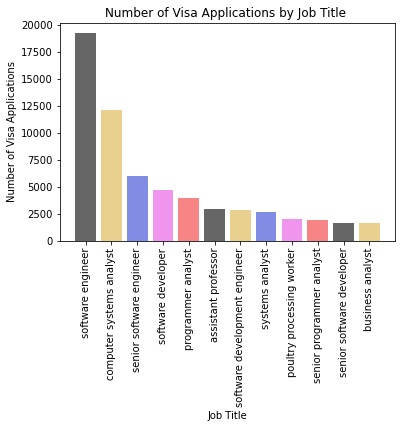

<Figure size 432x288 with 0 Axes>

In [45]:
fig, ax = plt.subplots()

JobTitle = ('software engineer', 'computer systems analyst', 'senior software engineer', 'software developer', 'programmer analyst', 'assistant professor', 'software development engineer', 'systems analyst', 'poultry processing worker', 'senior programmer analyst', 'senior software developer', 'business analyst')
NumberofVisaApplications = [19211, 12138, 5978, 4721, 3918, 2952, 2814, 2670, 1989, 1930, 1671, 1593]
y_pos = np.arange(len(JobTitle))
couleur = ['#000000', '#dbb243', '#2e42d3', '#e54fe3', '#f23434']
plt.title('Number of Visa Applications by Job Title ')
plt.ylabel('Number of Visa Applications')
plt.xlabel("Job Title")
plt.bar(y_pos, NumberofVisaApplications, align='center', alpha=0.6, color=couleur)
ax.set_xticks(range(len(JobTitle)))
ax.set_xticklabels(JobTitle, rotation='vertical')
plt.show()
plt.savefig('Number of Visa Applications by Job Title.png')

Es ist noch eine Spalte mit Berufsbezeichnunge verfügbar


In [50]:
case_noindex = visas_df.columns.get_loc('job_title_9089')
case_noindexnumber = visas_df.columns.get_loc('job_title_908')
casenumberlist = []


for value in visas_df.iloc[0:135269,case_noindex]:
    casenumberlist.append(value)

for value in visas_df.iloc[135269:374362,case_noindexnumber]:
    casenumberlist.append(value)

visas_df['casenumber'] = casenumberlist
visas_df.drop(visas_df.columns[[case_noindex,case_noindexnumber]], axis=1, inplace=True)

ValueError: Usecols do not match columns, columns expected but not found: ['job_title_9089', 'job_title_908']